In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import os


for file_path in glob(r"C:\Users\hp\Pictures\10 Academy\week1\news-sentiment-stock-analysis\Data\yfinance_data\*_historical_data.csv"):
    df = pd.read_csv(file_path)
    print(f"Columns in {os.path.basename(file_path)}: {df.columns.tolist()}")


Columns in AAPL_historical_data.csv: ['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Dividends', 'Stock Splits']
Columns in AMZN_historical_data.csv: ['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Dividends', 'Stock Splits']
Columns in GOOG_historical_data.csv: ['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Dividends', 'Stock Splits']
Columns in META_historical_data.csv: ['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Dividends', 'Stock Splits']
Columns in MSFT_historical_data.csv: ['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Dividends', 'Stock Splits']
Columns in NVDA_historical_data.csv: ['Date      ', ' Open                ', ' High                ', ' Low                 ', ' Close               ', ' Adj Close           ', ' Volume    ', ' Dividends', ' Stock Splits']
Columns in TSLA_historical_data.csv: ['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Dividends', 'Stock Splits

In [11]:

stock_data = {}

for file_path in glob(r"C:\Users\hp\Pictures\10 Academy\week1\news-sentiment-stock-analysis\Data\yfinance_data\*_historical_data.csv"):
    df = pd.read_csv(file_path)

    df.columns = df.columns.str.strip()
  
    df['Date'] = pd.to_datetime(df['Date'])
    
    ticker = os.path.basename(file_path).split("_")[0]
    df['stock'] = ticker
    stock_data[ticker] = df

stock_prices = pd.concat(stock_data.values(), ignore_index=True)
stock_prices.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,stock
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0,AAPL
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0,AAPL
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0,AAPL
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0,AAPL
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0,AAPL


In [14]:
sentiment_df = pd.read_csv(r"C:\Users\hp\Pictures\10 Academy\week1\news-sentiment-stock-analysis\Data/sentiment_by_stock_date.csv", parse_dates=["date"])
sentiment_df.rename(columns={"date": "Date"}, inplace=True)
sentiment_df.head()


,Date,stock,polarity
0,2011-04-27 21:01:48-04:00,DGP,0.000000
1,2011-04-28 13:49:29-04:00,ESR,0.136364
2,2011-04-28 15:00:36-04:00,DEJ,0.000000
3,2011-04-29 13:47:06-04:00,AIA,-0.166667
4,2011-04-29 16:11:05-04:00,GDL,0.500000


datetime64[ns]
datetime64[ns, UTC-04:00]


<Figure size 1500x600 with 0 Axes>

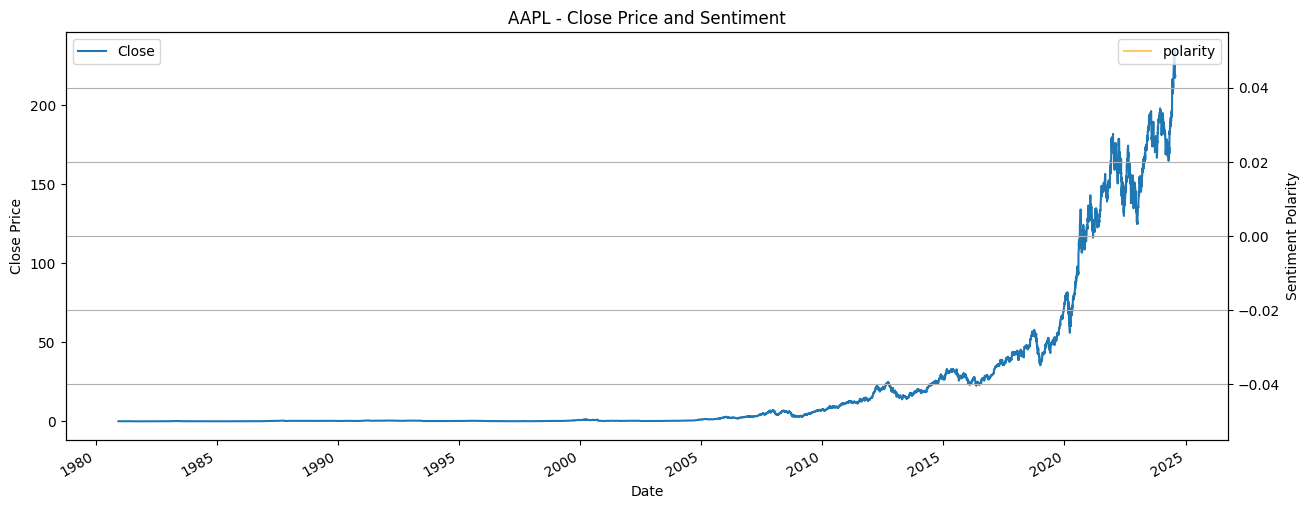

In [18]:
print(stock_prices['Date'].dtype)
print(sentiment_df['Date'].dtype)

sentiment_df['Date'] = sentiment_df['Date'].dt.tz_localize(None)

merged_df = pd.merge(
    stock_prices,
    sentiment_df,
    how="left",
    left_on=["Date", "stock"],
    right_on=["Date", "stock"]
)


plt.figure(figsize=(15, 6))
ticker = "AAPL"
subset = merged_df[merged_df["stock"] == ticker]

ax1 = subset.plot(x="Date", y="Close", title=f"{ticker} - Close Price and Sentiment", figsize=(15, 6))
ax2 = ax1.twinx()
subset.plot(x="Date", y="polarity", ax=ax2, color="orange", alpha=0.6)
ax1.set_ylabel("Close Price")
ax2.set_ylabel("Sentiment Polarity")
plt.grid()
plt.show()


In [ ]:
# Check correlation between sentiment polarity and price changes
merged_df["Price_Change"] = merged_df.groupby("stock")["Close"].pct_change()
correlation = merged_df[["polarity", "Price_Change"]].corr()
correlation
